<div style='background-color:orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align:center ; top-padding:5px'>
        Table of Contents
    </h1></i></u></b>
    <li><a href='#imports'>Imports</a>
    <li><a href='#identifycols'>Identify Columns For Exploration</a>
    <li><a href='#questions'>Questions to Answer</a>
    <li><a href='#misc'>Miscellaneous</a>
    </li>
</div>

<div style='background-color:orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Imports
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [1]:
# Vectorization & Dataframe
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# stats
from scipy import stats

# Regex
import re

# .py files
import wrangle as w

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set default matplotlib plot style to 'bmh'
# mpl.style.use('bmh')

<div style='background-color:orange'>
<a id='identifycols'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Identify Columns For Exploration
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [3]:
# Get the master filtered dataset
master = w.wrangle()
master.head(3)

,crash_id,$1000_damage_to_any_one_person's_property,active_school_zone_flag,adjusted_average_daily_traffic_amount,adjusted_percentage_of_average_daily_traffic_for_trucks,adjusted_roadway_part,agency,at_intersection_flag,average_daily_traffic_amount,average_daily_traffic_year,...,charge,citation,person_age,person_ethnicity,person_gender,person_helmet,person_injury_severity,person_type,physical_location_of_an_occupant,crash_datetime
0,16189632,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,OPERATE UNREGISTERED MOTOR VEHICLE,TX52Q80UKZPL,37,W - WHITE,1 - MALE,1 - NOT WORN,A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-01 11:23:00
1,16203470,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,"NO CLASS ""M"" LICENSE",TX52QD0NAP34,30,H - HISPANIC,1 - MALE,"3 - WORN, NOT DAMAGED",B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-04 13:16:00
2,16192023,Yes,NO,no data,no data,1 - MAIN/PROPER LANE,HARRIS COUNTY SHERIFF'S OFFICE,False,no data,no data,...,NO CHARGES,no data,21,W - WHITE,1 - MALE,"2 - WORN, DAMAGED",A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-05 20:45:00


<div style='background-color:orange'>
<a id='questions'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Questions to Answer
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    <li><a href='#seasonality'>Seasonality</a>
    <li><a href='#question2'>Question 2</a>
    <li><a href='#question3'>Question 3</a>
    <li><a href='#question4'>Question 4</a>
    </li>
</div>

<a id='question1'></a>
<h3><b><i>
    Question 1
</i></b></h3>
<li><a href='#questions'>Questions to Answer Top</a></li>

1. Does time of day matter?

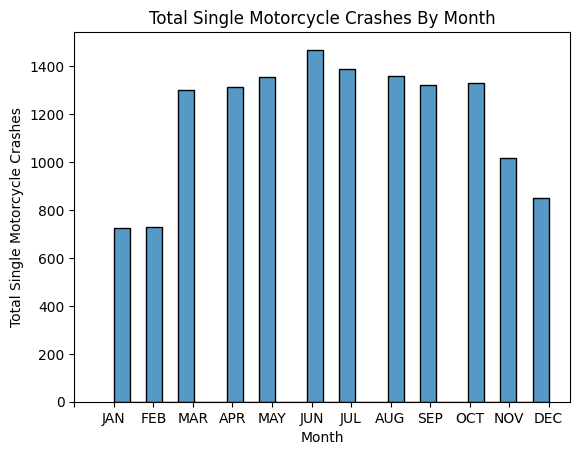

In [4]:
sns.histplot(data=master, x='crash_month')
plt.title('Total Single Motorcycle Crashes By Month')
plt.xlabel('Month')
plt.xticks(ticks=range(13), labels=['', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.ylabel('Total Single Motorcycle Crashes')
plt.show()

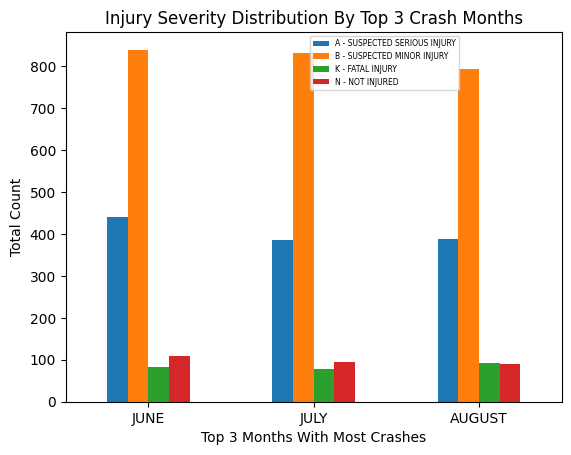

In [5]:
top3months = master[master.crash_datetime.dt.month.isin([6, 7, 8])]
ct = pd.crosstab(top3months.crash_datetime.dt.month, top3months.person_injury_severity)
ax = ct.plot(kind='bar')
plt.title('Injury Severity Distribution By Top 3 Crash Months')
plt.xlabel('Top 3 Months With Most Crashes')
plt.xticks(ticks=range(3), labels=['JUNE', 'JULY', 'AUGUST'], rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 5.5})  # Set the size of the legend
legend.set_bbox_to_anchor((0.8, 1))
plt.show()

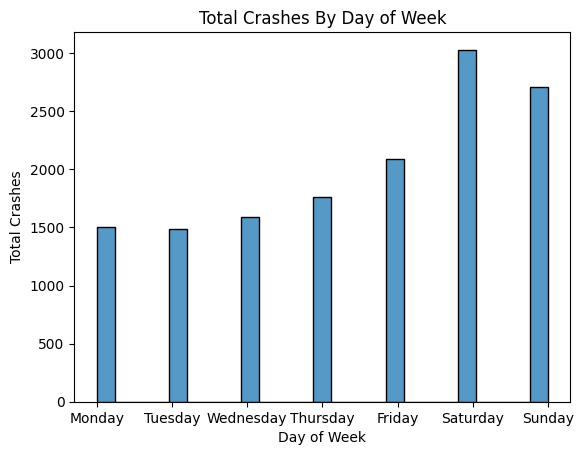

In [6]:
sns.histplot(data=master, x=master.crash_datetime.dt.dayofweek)
plt.title('Total Crashes By Day of Week')
plt.xlabel('Day of Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Total Crashes')
plt.show()

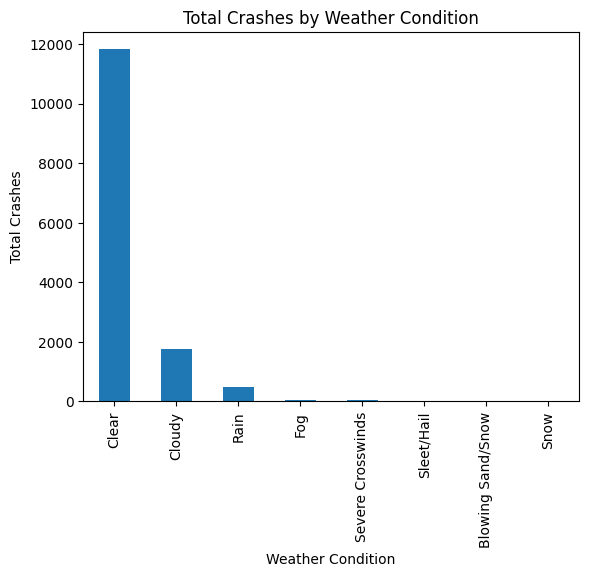

In [7]:
weather_stuff = master[master.weather_condition.str.startswith(('1', '2', '3', '4', '5', '6', '7', '8'))]
weather_stuff.weather_condition.value_counts().plot(kind='bar')
plt.title('Total Crashes by Weather Condition')
plt.xlabel('Weather Condition')
plt.xticks(ticks=range(8), labels=['Clear', 'Cloudy', 'Rain', 'Fog', 'Severe Crosswinds', 'Sleet/Hail', 'Blowing Sand/Snow', 'Snow'], rotation=90)
plt.ylabel('Total Crashes')
plt.show()

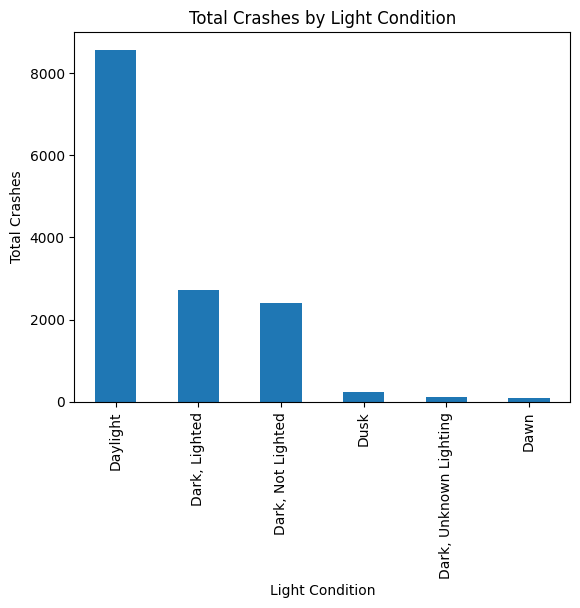

In [8]:
light_stuff = master[master.light_condition.str.startswith(('1', '2', '3', '4', '5', '6'))]
light_stuff.light_condition.value_counts().plot(kind='bar')
plt.title('Total Crashes by Light Condition')
plt.xlabel('Light Condition')
plt.xticks(ticks=range(6), labels=['Daylight', 'Dark, Lighted', 'Dark, Not Lighted', 'Dusk', 'Dark, Unknown Lighting', 'Dawn'], rotation=90)
plt.ylabel('Total Crashes')
plt.show()

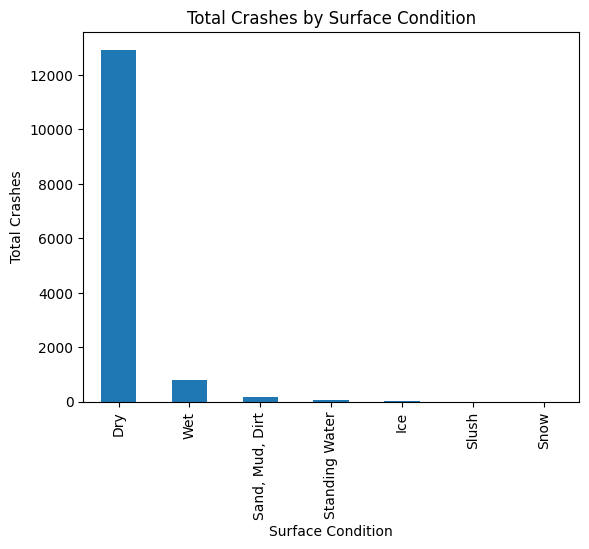

In [9]:
surface_stuff = master[master.surface_condition.str.startswith(('1', '2', '3', '4', '5', '6', '7'))]
surface_stuff.surface_condition.value_counts().plot(kind='bar')
plt.title('Total Crashes by Surface Condition')
plt.xlabel('Surface Condition')
plt.xticks(ticks=range(7), labels=['Dry', 'Wet', 'Sand, Mud, Dirt', 'Standing Water', 'Ice', 'Slush', 'Snow'], rotation=90)
plt.ylabel('Total Crashes')
plt.show()

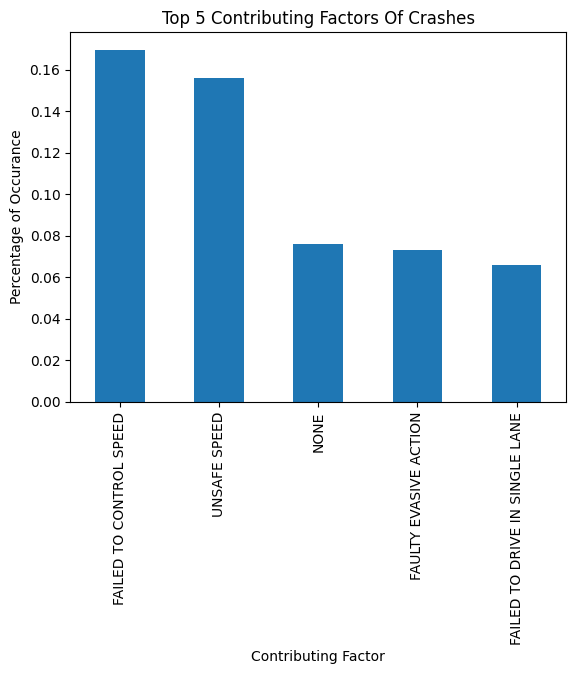

In [10]:
cont_factor = master[~master.contributing_factors.str.startswith('OTHER')]
cont_factor.contributing_factors.value_counts(normalize=True).head().plot(kind='bar')
plt.title('Top 5 Contributing Factors Of Crashes')
plt.xlabel('Contributing Factor')
plt.ylabel('Percentage of Occurance')
plt.show()

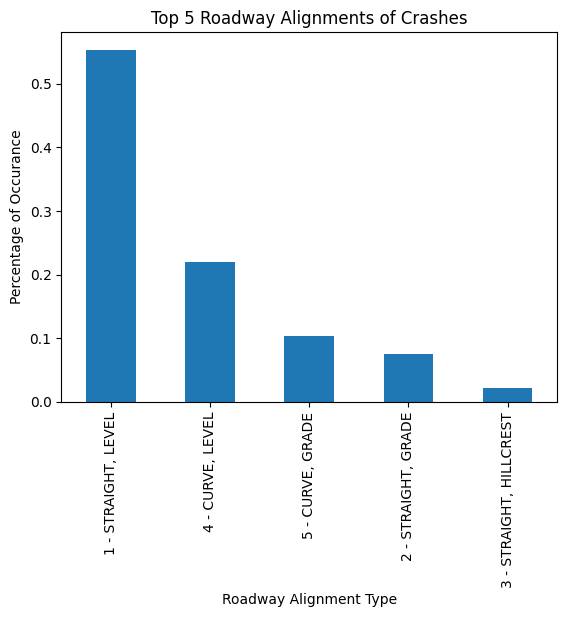

In [11]:
master.roadway_alignment.value_counts(normalize=True).head().plot(kind='bar')
plt.title('Top 5 Roadway Alignments of Crashes')
plt.xlabel('Roadway Alignment Type')
plt.ylabel('Percentage of Occurance')
plt.show()

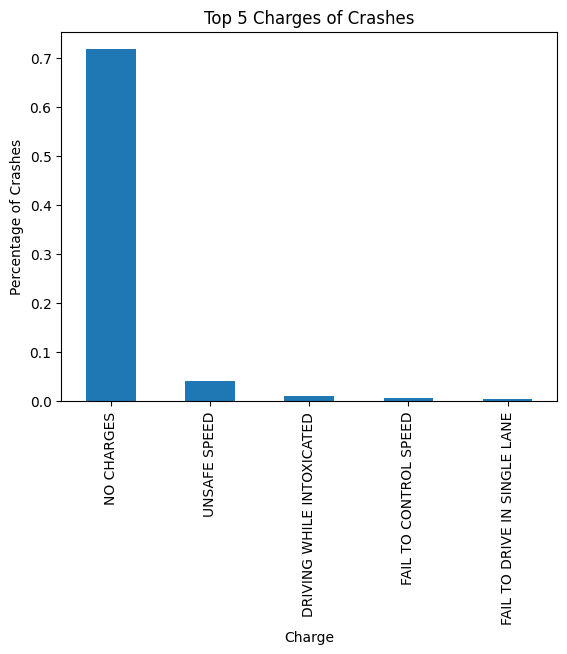

In [12]:
master.charge.value_counts(normalize=True).head().plot(kind='bar')
plt.title('Top 5 Charges of Crashes')
plt.xlabel('Charge')
plt.ylabel('Percentage of Crashes')
plt.show()

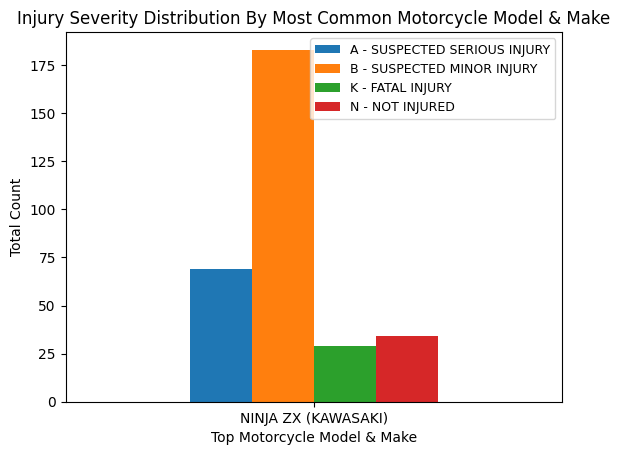

In [13]:
top_makemodel = master[master.vehicle_model_name == 'NINJA ZX (KAWASAKI)']
ct = pd.crosstab(top_makemodel.vehicle_model_name, top_makemodel.person_injury_severity)
ax = ct.plot(kind='bar')
plt.title('Injury Severity Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
#legend.set_bbox_to_anchor((0.8, 1))
plt.show()

In [14]:
top_makemodel.vehicle_defect_1.value_counts()

vehicle_defect_1
no data                                300
98 - OTHER  (EXPLAIN IN NARRATIVE)       6
12 - DEFECTIVE OR SLICK TIRES            3
10 - DEFECTIVE OR NO VEHICLE BRAKES      3
11 - DEFECTIVE STEERING MECHANISM        3
Name: count, dtype: int64

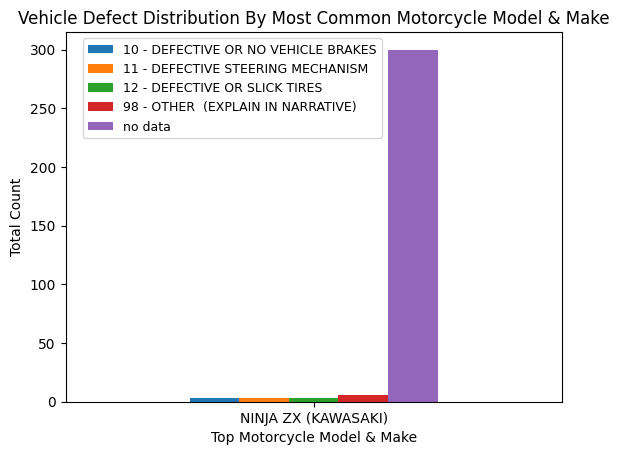

In [15]:
ct = pd.crosstab(top_makemodel.vehicle_model_name, top_makemodel.vehicle_defect_1)
ax = ct.plot(kind='bar')
plt.title('Vehicle Defect Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
legend.set_bbox_to_anchor((0.65, 1))
plt.show()

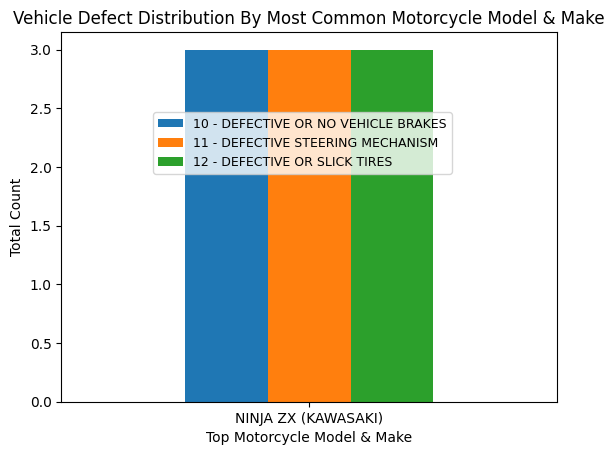

In [16]:
smaller_top_makemodel = top_makemodel[~top_makemodel.vehicle_defect_1.str.startswith(('no data', '98 - OTHER  (EXPLAIN IN NARRATIVE)'))]
ct = pd.crosstab(smaller_top_makemodel.vehicle_model_name, smaller_top_makemodel.vehicle_defect_1)
ax = ct.plot(kind='bar')
plt.title('Vehicle Defect Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
legend.set_bbox_to_anchor((0.8, 0.8))
plt.show()

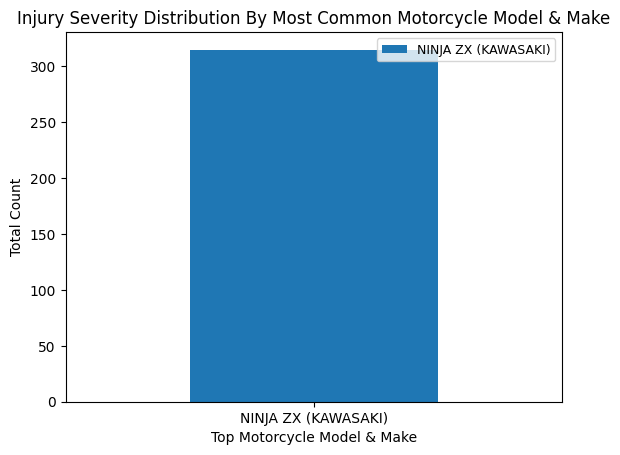

In [17]:
top_makemodel = master[master.vehicle_model_name == 'NINJA ZX (KAWASAKI)']
ct = pd.crosstab(top_makemodel.vehicle_model_name, top_makemodel.vehicle_model_name)
ax = ct.plot(kind='bar')
plt.title('Injury Severity Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
#legend.set_bbox_to_anchor((0.8, 1))
plt.show()

In [18]:
master = pd.read_csv('master_modeling_updated1.csv')
master

,crash_id,person_age,person_ethnicity,person_gender,has_motocycle_endorsment,person_injury_severity,vehicle_body_style,vehicle_color,vehicle_make,vehicle_model,vehicle_model_year,vehicle_make_country,injury_binary
0,16189632,37,w - white,1 - male,0,a - suspected serious injury,mc - motorcycle,blu - blue,harley-davidson,fld,2007,USA,1
1,16203470,30,h - hispanic,1 - male,0,b - suspected minor injury,mc - motorcycle,gry - gray,suzuki,gsx-r600,2004,Japan,1
2,16192023,21,w - white,1 - male,0,a - suspected serious injury,mc - motorcycle,blu - blue,yamaha,yzfr6,2017,Japan,1
3,16196720,18,h - hispanic,1 - male,0,b - suspected minor injury,mc - motorcycle,blu - blue,yamaha,rz500,2002,Japan,1
4,16189103,28,w - white,1 - male,1,b - suspected minor injury,mc - motorcycle,blk - black,harley-davidson,fxdf,2009,USA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14129,19321499,49,w - white,2 - female,1,b - suspected minor injury,mc - motorcycle,blk - black,yamaha,xvs1100,2013,Japan,1
14130,19323296,33,w - white,1 - male,1,a - suspected serious injury,mc - motorcycle,grn - green,kawasaki,kx250,2019,Japan,1
14131,19327850,35,w - white,1 - male,1,a - suspected serious injury,mc - motorcycle,blk - black,honda,cr250,2016,Japan,1
14132,19330330,42,b - black,2 - female,1,b - suspected minor injury,mc - motorcycle,mul - multicolored,honda,cbr650,2016,Japan,1


In [19]:
# Top 3 make model and injury distribution
#master['make_and_model'] = master.vehicle_make + ', ' + master.vehicle_model
#top3list = master.make_and_model.value_counts().head(3).index.to_list()
#top3makemodel = master[master.make_and_model.isin(top3list)]
#pd.crosstab(top3makemodel.make_and_model, top3makemodel.person_injury_severity).plot(kind='bar')
#plt.title('Injury Severity Distribution By Top 3 Motorcycle Model & Make')
#plt.xlabel('Motorcycle Make & Model')
#plt.xticks(rotation=0)
#plt.ylabel('Total Count')
#plt.title()

In [20]:
# Bottom 3 make model and injury distribution
#master['make_and_model'] = master.vehicle_make + ', ' + master.vehicle_model
#bottom3list = master.make_and_model.value_counts().tail(3).index.to_list()
#bottom3makemodel = master[master.make_and_model.isin(bottom3list)]
#pd.crosstab(bottom3makemodel.make_and_model, bottom3makemodel.person_injury_severity).plot(kind='bar')
#plt.title('Injury Severity Distribution By Bottom 3 Motorcycle Model & Make')
#plt.xlabel('Motorcycle Make & Model')
#plt.xticks(rotation=0)
#plt.ylabel('Total Count')
#plt.title()

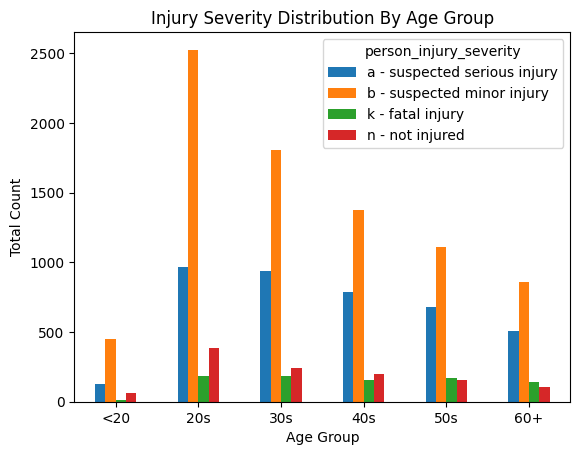

In [21]:
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['<20', '20s', '30s', '40s', '50s', '60+']
master['age_range'] = pd.cut(master['person_age'], bins=bins, labels=labels, right=False)
pd.crosstab(master.age_range, master.person_injury_severity).plot(kind='bar')
plt.title('Injury Severity Distribution By Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
plt.show()

In [22]:
master.person_ethnicity.value_counts()

person_ethnicity
w - white                          9111
h - hispanic                       2944
b - black                          1634
a - asian                           223
98 - other                          125
99 - unknown                         53
i - amer. indian/alaskan native      44
Name: count, dtype: int64

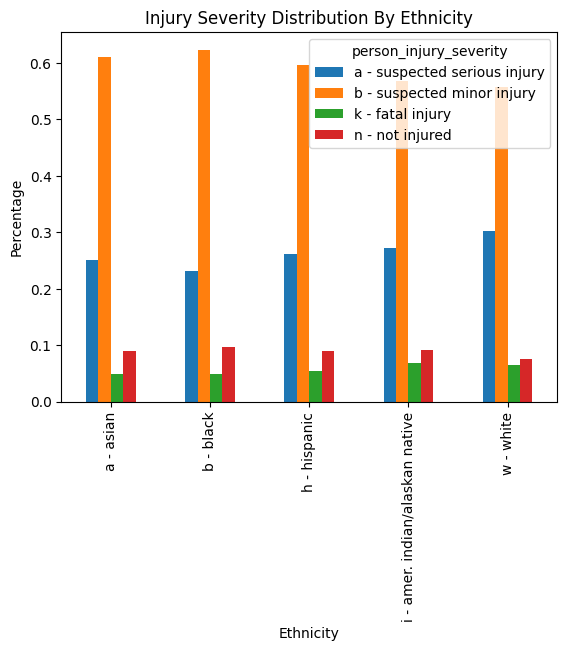

In [23]:
ethnicitystuff = master[~master.person_ethnicity.str.startswith(('98', '99'))]
ethniccross = pd.crosstab(ethnicitystuff.person_ethnicity, ethnicitystuff.person_injury_severity, normalize='index').plot(kind='bar')
plt.title('Injury Severity Distribution By Ethnicity')
plt.xlabel('Ethnicity')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.show()

<div style='background-color:orange'>
<a id='misc'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Miscellaneous
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    <li><a href='#miscage'>Age</a>
    <li><a href='#miscethnicity'>Ethnicity</a>
    <li><a href='#miscmotorcycleendorsement'>Motorcycle Endorsement</a>
    <li><a href='#miscvehiclebodystyle'>Vehicle Body Style</a>
    <li><a href='#miscvehiclecolor'>Vehicle Color</a>
    <li><a href='#miscvehiclemake'>Vehicle Make</a>
    <li><a href='#miscvehiclemodel'>Vehicle Model</a>
    <li><a href='#miscvehiclemodelyear'>Vehicle Model Year</a>
    <li><a href='#miscvehiclemakecountry'>Vehicle Make Country</a>
    <li><a href='#miscmakeandmodel'>Make And Model</a>
    </li>
</div>

<a id='miscage'></a>
<h3><b><i>
    Age
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The age group of the motorcyclist does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The age group of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

In [24]:
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['20s', '30s', '40s', '50s', '60+']
master['age_range'] = pd.cut(master['person_age'], bins=bins, labels=labels, right=False)

<Axes: xlabel='age_range'>

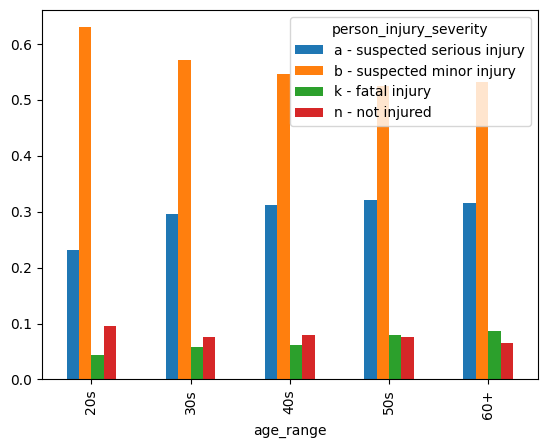

In [25]:
pd.crosstab(master.age_range, master.person_injury_severity, normalize='index').plot(kind='bar')

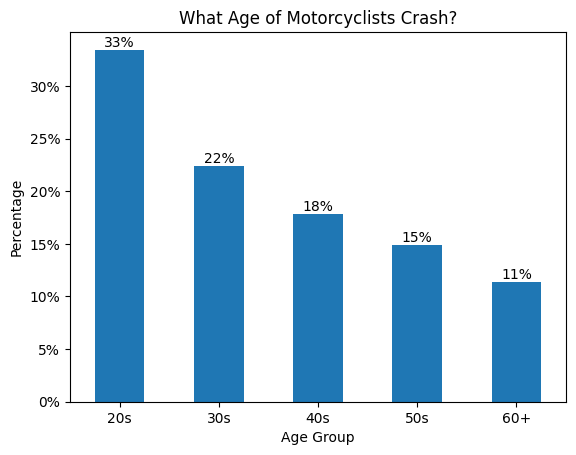

In [26]:
ax = master.age_range.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('What Age of Motorcyclists Crash?')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.yticks(ticks=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3], labels=['0%', '5%', '10%', '15%', '20%', '25%', '30%'])
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

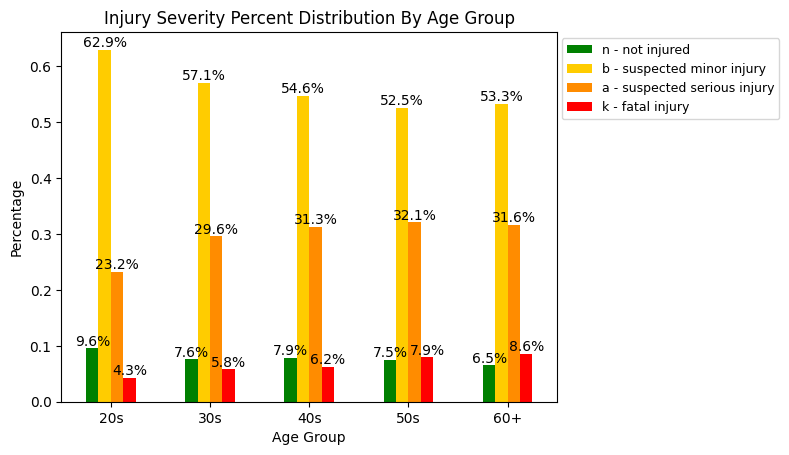

In [27]:
cross_tab = pd.crosstab(master.age_range, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

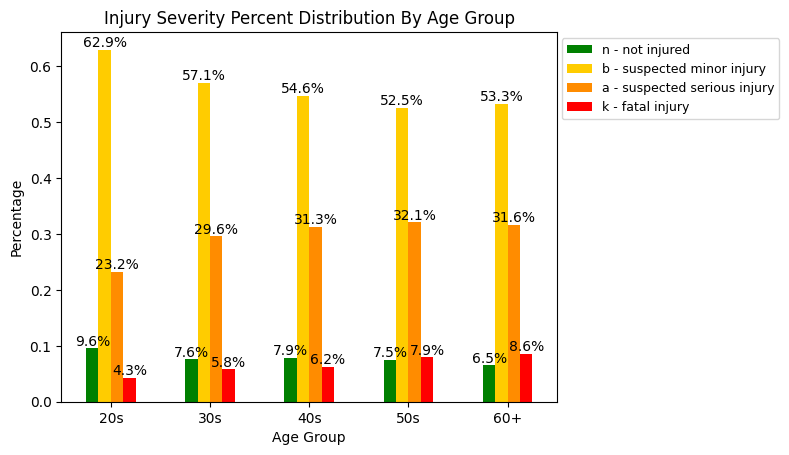

In [28]:
cross_tab = pd.crosstab(master.age_range, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [29]:
for vals in master.age_range.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.age_range == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mAge Range:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mAge Range:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: 30s
Injury: 1
Statistic: 1.7690344188685856
P-Value: 0.18350162245742066

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: 30s
Injury: 0
Statistic: 1.7690344188685854
P-Value: 0.1835016224574207

========== REJECT NULL HYPOTHESIS ==========
Age Range: 20s
Injury: 1
Statistic: 17.970448695459723
P-Value: 2.2436111037380208e-05

========== REJECT NULL HYPOTHESIS ==========
Age Range: 20s
Injury: 0
Statistic: 17.970448695459723
P-Value: 2.2436111037380208e-05

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: 40s
Injury: 1
Statistic: 0.26599402896997026
P-Value: 0.6060317596251912

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: 40s
Injury: 0
Statistic: 0.26599402896997026
P-Value: 0.6060317596251912

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: 50s
Injury: 1
Statistic: 1.2250074824245767
P-Value: 0.2683801655278772

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: 50s
Injury: 0
Statistic: 1.225

<b><i>
    REJECT NULL HYPOTHESIS - FOR 20s and 60+!
</i></b>

The age group of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- AGE // REJECT VALUES
    - 20s // 1, 0
    - 60+ // 1, 0

---

<a id='miscethnicity'></a>
<h3><b><i>
    Ethnicity
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The ethnicity of the motorcyclist does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The ethnicity of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

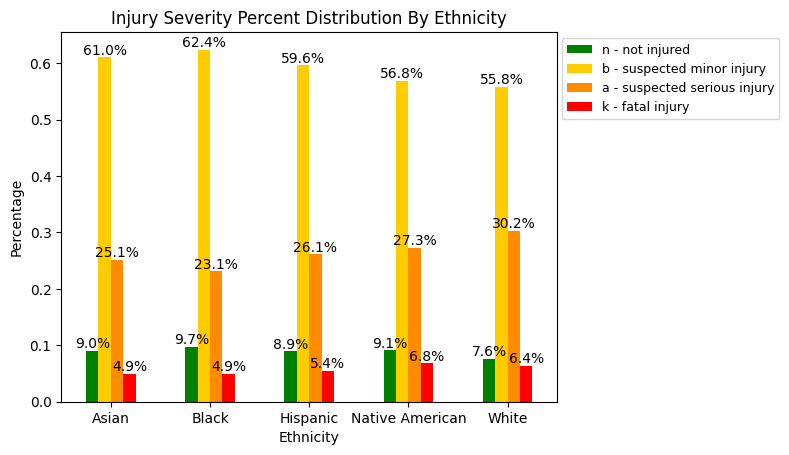

In [30]:
cross_tab = pd.crosstab(master.person_ethnicity[~master.person_ethnicity.str.startswith(('98', '99'))], master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Ethnicity')
plt.xlabel('Ethnicity')
plt.xticks(rotation=0, ticks=range(5), labels=['Asian', 'Black', 'Hispanic', 'Native American', 'White'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [31]:
for vals in master.person_ethnicity[~master.person_ethnicity.str.startswith(('98', '99'))].unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.person_ethnicity == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mEthnicity:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mEthnicity:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== REJECT NULL HYPOTHESIS ==========
Ethnicity: w - white
Injury: 1
Statistic: 12.921227847188085
P-Value: 0.0003248766846379219

========== REJECT NULL HYPOTHESIS ==========
Ethnicity: w - white
Injury: 0
Statistic: 12.921227847188085
P-Value: 0.0003248766846379219

========== ACCEPT NULL HYPOTHESIS ==========
Ethnicity: h - hispanic
Injury: 1
Statistic: 2.502870101394623
P-Value: 0.11363902962556253

========== ACCEPT NULL HYPOTHESIS ==========
Ethnicity: h - hispanic
Injury: 0
Statistic: 2.502870101394623
P-Value: 0.11363902962556253

========== REJECT NULL HYPOTHESIS ==========
Ethnicity: b - black
Injury: 1
Statistic: 5.299761599477749
P-Value: 0.021328343326624272

========== REJECT NULL HYPOTHESIS ==========
Ethnicity: b - black
Injury: 0
Statistic: 5.299761599477749
P-Value: 0.021328343326624272

========== ACCEPT NULL HYPOTHESIS ==========
Ethnicity: i - amer. indian/alaskan native
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Ethn

<b><i>
    REJECT NULL HYPOTHESIS - FOR BLACK AND WHITE!
</i></b>

The ethnicity of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- ETHNICITY // REJECT VALUES
    - White // 1, 0
    - Black // 1, 0

---

<a id='miscmotorcycleendorsement'></a>
<h3><b><i>
    Motorcycle Endorsement
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> Whether or not the motorcyclist has a motorcycle endorsement does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> Whether or not the motorcyclist has a motorcycle endorsement does make a significant difference in the injury severity of single motorcycle crashes in Texas.

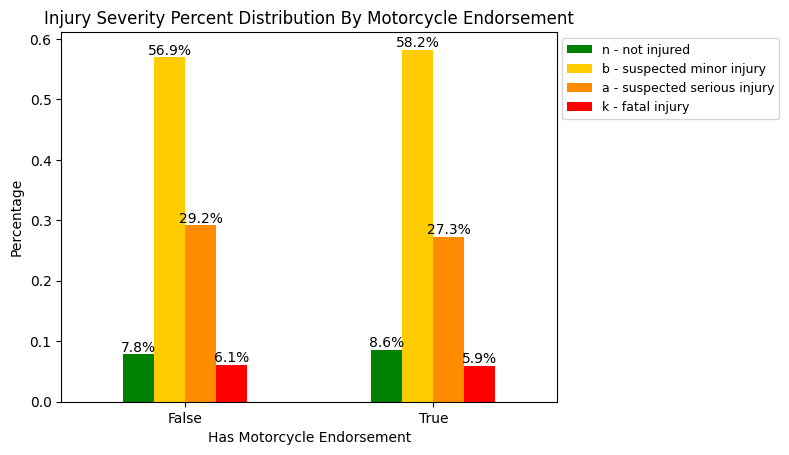

In [32]:
cross_tab = pd.crosstab(master.has_motocycle_endorsment, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Motorcycle Endorsement')
plt.xlabel('Has Motorcycle Endorsement')
plt.xticks(rotation=0, ticks=range(2), labels=['False', 'True'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [33]:
for vals in master.has_motocycle_endorsment.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.has_motocycle_endorsment == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Endorsement:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Endorsement:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Endorsement: 0
Injury: 1
Statistic: 2.9319201148103025
P-Value: 0.08684414919099596

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Endorsement: 0
Injury: 0
Statistic: 2.9319201148103025
P-Value: 0.08684414919099596

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Endorsement: 1
Injury: 1
Statistic: 2.9319201148103025
P-Value: 0.08684414919099596

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Endorsement: 1
Injury: 0
Statistic: 2.9319201148103025
P-Value: 0.08684414919099596



<b><i>
    ACCEPT NULL HYPOTHESIS!
</i></b>

Whether or not the motorcyclist has a motorcycle endorsement does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

---

<a id='miscvehiclebodystyle'></a>
<h3><b><i>
    Vehicle Body Style
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The body style of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The body style of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

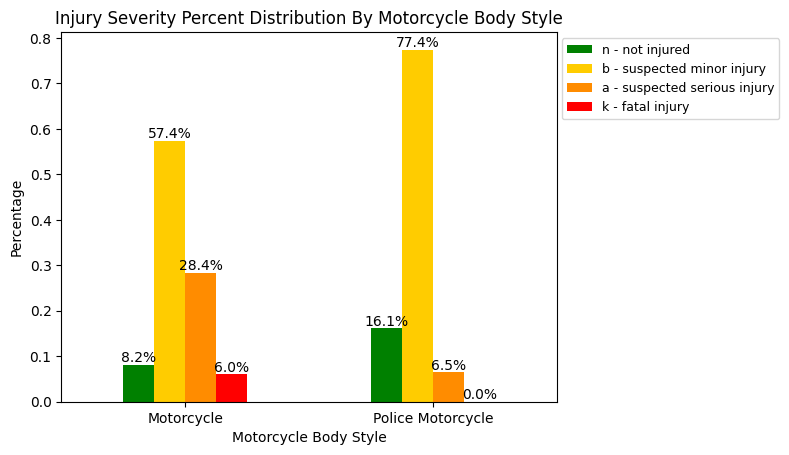

In [34]:
cross_tab = pd.crosstab(master.vehicle_body_style, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Motorcycle Body Style')
plt.xlabel('Motorcycle Body Style')
plt.xticks(rotation=0, ticks=range(2), labels=['Motorcycle', 'Police Motorcycle'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [35]:
for vals in master.vehicle_body_style.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.vehicle_body_style == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Body Style:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Body Style:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Body Style: mc - motorcycle
Injury: 1
Statistic: 1.6664633689886195
P-Value: 0.1967329074072452

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Body Style: mc - motorcycle
Injury: 0
Statistic: 1.6664633689886195
P-Value: 0.1967329074072452

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Body Style: pm - police motorcycle
Injury: 1
Statistic: 1.6664633689886195
P-Value: 0.1967329074072452

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Body Style: pm - police motorcycle
Injury: 0
Statistic: 1.6664633689886195
P-Value: 0.1967329074072452



<b><i>
    ACCEPT NULL HYPOTHESIS!
</i></b>

The body style of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

---

<a id='miscvehiclecolor'></a>
<h3><b><i>
    Vehicle Color
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The color of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The color of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

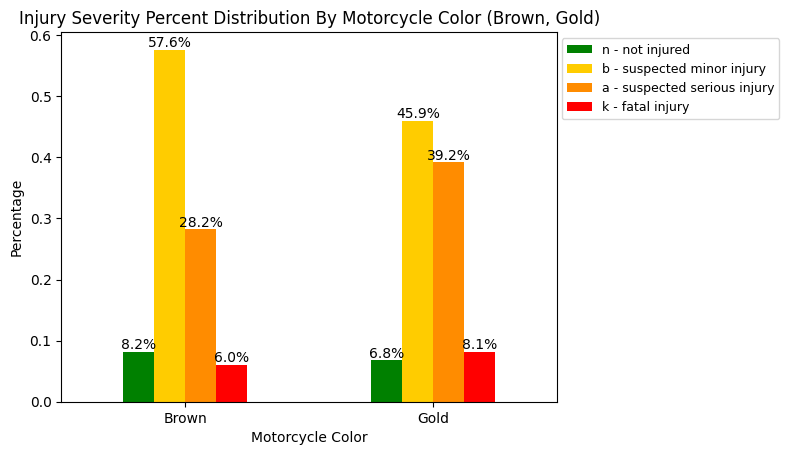

In [36]:
cross_tab = pd.crosstab(master.vehicle_color.str.startswith(('bro', 'gld')), master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Motorcycle Color (Brown, Gold)')
plt.xlabel('Motorcycle Color')
plt.xticks(rotation=0, ticks=range(2), labels=['Brown', 'Gold'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [37]:
for vals in master.vehicle_color.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.vehicle_color == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Color:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Color:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: blu - blue
Injury: 1
Statistic: 0.288639138728697
P-Value: 0.5910939247405596

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: blu - blue
Injury: 0
Statistic: 0.288639138728697
P-Value: 0.5910939247405596

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: gry - gray
Injury: 1
Statistic: 0.6166268814406752
P-Value: 0.4323035267557743

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: gry - gray
Injury: 0
Statistic: 0.6166268814406753
P-Value: 0.4323035267557743

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: blk - black
Injury: 1
Statistic: 2.592351391635051
P-Value: 0.10738081393268288

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: blk - black
Injury: 0
Statistic: 2.592351391635051
P-Value: 0.10738081393268288

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: red - red
Injury: 1
Statistic: 0.1604229434336283
P-Value: 0.6887674213098465



<b><i>
    ACCEPT NULL HYPOTHESIS!
</i></b>

The color of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

---

<a id='miscvehiclemake'></a>
<h3><b><i>
    Vehicle Make
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The make of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The make of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

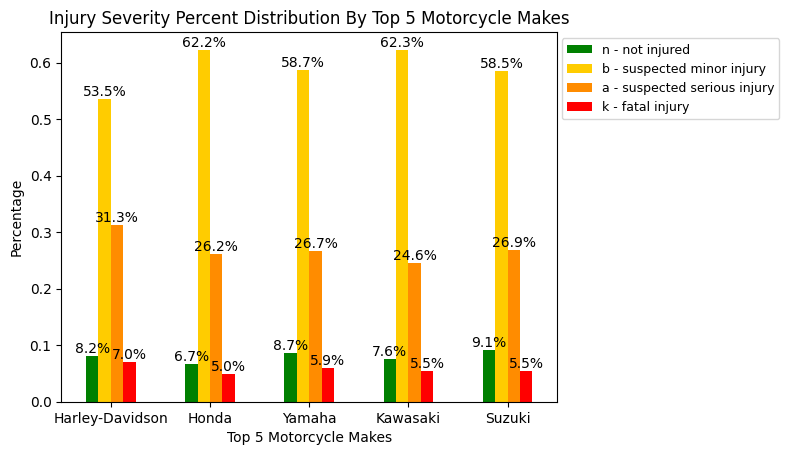

In [38]:
cross_tab = pd.crosstab(master[master.vehicle_make.isin(master.vehicle_make.value_counts().head().index)].vehicle_make, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Top 5 Motorcycle Makes')
plt.xlabel('Top 5 Motorcycle Makes')
plt.xticks(rotation=0, ticks=range(5), labels=['Harley-Davidson', 'Honda', 'Yamaha', 'Kawasaki', 'Suzuki'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [39]:
for vals in master.vehicle_make.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.vehicle_make == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mVehicle Make:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mVehicle Make:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: harley-davidson
Injury: 1
Statistic: 0.0001147099851115574
P-Value: 0.9914546005131627

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: harley-davidson
Injury: 0
Statistic: 0.00011470998511155741
P-Value: 0.9914546005131627

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: suzuki
Injury: 1
Statistic: 0.5086736664110209
P-Value: 0.4757135800858242

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: suzuki
Injury: 0
Statistic: 0.5086736664110207
P-Value: 0.4757135800858243

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: yamaha
Injury: 1
Statistic: 2.0674269094023496
P-Value: 0.1504752091002952

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: yamaha
Injury: 0
Statistic: 2.067426909402349
P-Value: 0.1504752091002952

========== REJECT NULL HYPOTHESIS ==========
Vehicle Make: honda
Injury: 1
Statistic: 8.56685245158444
P-Value: 0.003423384750211503

========== REJECT NULL HYPOTHESI

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: victoria iron & metal
Injury: 0
Statistic: 2.331719808393885
P-Value: 0.12676175977412707

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: vespa
Injury: 1
Statistic: 0.7061110876539476
P-Value: 0.4007378674456744

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: vespa
Injury: 0
Statistic: 0.7061110876539476
P-Value: 0.4007378674456744

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: diamond reo
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: diamond reo
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: aprilia
Injury: 1
Statistic: 0.8382293512892725
P-Value: 0.35990366871438195

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: aprilia
Injury: 0
Statistic: 0.8382293512892725
P-Value: 0.35990366871438195

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: homemade vehicle
Injury: 1
St

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: zongshen
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: mini
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: mini
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: heritage trailers
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: heritage trailers
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: plymouth
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: plymouth
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: action equipment
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: action equipment
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== 

<b><i>
    REJECT NULL HYPOTHESIS - FOR SOME!
</i></b>

The make of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- MAKE // REJECT VALUES
    - Honda // 1, 0
    - BMW // 1, 0
    - Polaris // 1, 0
    - Husqvarna // 1, 0
    - Polar // 1, 0

---

<a id='miscvehiclemodel'></a>
<h3><b><i>
    Vehicle Model
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The model of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The model of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

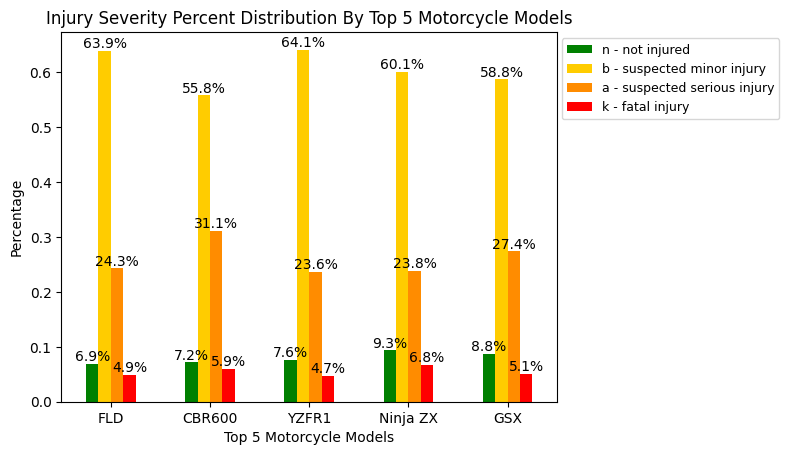

In [40]:
cross_tab = pd.crosstab(master[master.vehicle_model.isin(master.vehicle_model.value_counts().head().index)].vehicle_model, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Top 5 Motorcycle Models')
plt.xlabel('Top 5 Motorcycle Models')
plt.xticks(rotation=0, ticks=range(5), labels=['FLD', 'CBR600', 'YZFR1', 'Ninja ZX', 'GSX'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [41]:
for vals in master.vehicle_model.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.vehicle_model == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mVehicle Model:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mVehicle Model:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fld
Injury: 1
Statistic: 2.9571428610922923
P-Value: 0.08549889833861246

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fld
Injury: 0
Statistic: 2.9571428610922923
P-Value: 0.08549889833861246

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gsx-r600
Injury: 1
Statistic: 3.7732054233371515
P-Value: 0.05207973882326021

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gsx-r600
Injury: 0
Statistic: 3.7732054233371515
P-Value: 0.05207973882326021

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yzfr6
Injury: 1
Statistic: 0.16931491058134684
P-Value: 0.6807213873169056

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yzfr6
Injury: 0
Statistic: 0.16931491058134682
P-Value: 0.6807213873169056

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rz500
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rz500
Injury: 0
S

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: r1200
Injury: 0
Statistic: 1.957819582059142
P-Value: 0.16174670231656402

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: monster
Injury: 1
Statistic: 0.04971724915936422
P-Value: 0.8235560135234457

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: monster
Injury: 0
Statistic: 0.04971724915936422
P-Value: 0.8235560135234457

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gl1100
Injury: 1
Statistic: 0.1574161251555574
P-Value: 0.6915466551003684

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gl1100
Injury: 0
Statistic: 0.15741612515555736
P-Value: 0.6915466551003684

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zg1200
Injury: 1
Statistic: 0.02227847545438499
P-Value: 0.8813486677146558

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zg1200
Injury: 0
Statistic: 0.02227847545438499
P-Value: 0.8813486677146558

========== ACCEPT NULL HYPOTHESIS ========

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yxr660
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yw50
Injury: 1
Statistic: 0.00020876181692565239
P-Value: 0.9884720924474562

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yw50
Injury: 0
Statistic: 0.00020876181692565239
P-Value: 0.9884720924474562

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flht
Injury: 1
Statistic: 0.24842460455741003
P-Value: 0.6181865526901229

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flht
Injury: 0
Statistic: 0.24842460455741
P-Value: 0.6181865526901229

========== REJECT NULL HYPOTHESIS ==========
Vehicle Model: fltru
Injury: 1
Statistic: 9.598379402571327
P-Value: 0.001947491722302026

========== REJECT NULL HYPOTHESIS ==========
Vehicle Model: fltru
Injury: 0
Statistic: 9.598379402571327
P-Value: 0.001947491722302026

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: lightning
Injury: 1

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: kl650
Injury: 0
Statistic: 0.6988047401003901
P-Value: 0.4031856105606457

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhr/i
Injury: 1
Statistic: 0.03939600047850318
P-Value: 0.8426662004230027

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhr/i
Injury: 0
Statistic: 0.039396000478503175
P-Value: 0.8426662004230027

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: scout
Injury: 1
Statistic: 0.5526201348616324
P-Value: 0.45724908042732415

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: scout
Injury: 0
Statistic: 0.5526201348616324
P-Value: 0.45724908042732415

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: crf150
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: crf150
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cbr900
Injury: 1
Statistic: 0.0296716228066435

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: high-ball
Injury: 0
Statistic: 0.039396000478503175
P-Value: 0.8426662004230027

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: v7
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: v7
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: r100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: r100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cbr1100
Injury: 1
Statistic: 0.13415956429502918
P-Value: 0.7141576532872409

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cbr1100
Injury: 0
Statistic: 0.13415956429502918
P-Value: 0.7141576532872409

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flt
Injury: 1
Statistic: 3.4645669792027602
P-Value: 0.06269692149854553

========== ACCEPT NULL HYPOTHESIS ===

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcuse6
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtc
Injury: 1
Statistic: 0.5881635980175274
P-Value: 0.44313012383768535

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtc
Injury: 0
Statistic: 0.5881635980175274
P-Value: 0.44313012383768535

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 390
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 390
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vision
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vision
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 848
Injury: 1
Statistic: 0.03939600047850318
P-Value: 0.8426662004230027

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 848
Inj

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cb900
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xv1900
Injury: 1
Statistic: 0.4684595129007977
P-Value: 0.4936967195423362

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xv1900
Injury: 0
Statistic: 0.4684595129007977
P-Value: 0.4936967195423362

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxstsb
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxstsb
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vfr750
Injury: 1
Statistic: 0.009880739309364124
P-Value: 0.9208191679221919

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vfr750
Injury: 0
Statistic: 0.009880739309364124
P-Value: 0.9208191679221919

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xl600
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHE

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: america
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: america
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vn750
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vn750
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: r1150
Injury: 1
Statistic: 0.02227847545438499
P-Value: 0.8813486677146558

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: r1150
Injury: 0
Statistic: 0.02227847545438499
P-Value: 0.8813486677146558

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 1198
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 1198
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sr500
Injury: 1
Statistic: 0.0
P-Val

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gts
Injury: 1
Statistic: 0.24674739961792236
P-Value: 0.6193747027004618

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gts
Injury: 0
Statistic: 0.24674739961792239
P-Value: 0.6193747027004618

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cbr300
Injury: 1
Statistic: 0.11832202043075879
P-Value: 0.7308615675015205

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cbr300
Injury: 0
Statistic: 0.11832202043075879
P-Value: 0.7308615675015205

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: dl650
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: dl650
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 946
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 946
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ========

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 128i
Injury: 1
Statistic: 0.7548741415466742
P-Value: 0.38493742275651

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 128i
Injury: 0
Statistic: 0.7548741415466742
P-Value: 0.38493742275651

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fz07a
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fz07a
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: mt-01
Injury: 1
Statistic: 0.08358604584303586
P-Value: 0.7724952774231857

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: mt-01
Injury: 0
Statistic: 0.08358604584303586
P-Value: 0.7724952774231857

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gs750
Injury: 1
Statistic: 0.03939600047850318
P-Value: 0.8426662004230027

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gs750
Injury: 0
Statistic: 0.039396000478503175
P-Value: 0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrsi
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrsi
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxfb
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxfb
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xv16
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xv16
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vf500
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vf500
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flfb
Injury: 1
Statistic: 0.3269311986049807
P-Value: 0.5674717215268754

========== ACCEPT NULL HYPOT

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flstfi
Injury: 1
Statistic: 0.13415956429502918
P-Value: 0.7141576532872409

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flstfi
Injury: 0
Statistic: 0.13415956429502918
P-Value: 0.7141576532872409

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrxs
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrxs
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sr250
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sr250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gd250r
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gd250r
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: g series
Injury: 1
Statistic: 0.

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxe
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxe
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: mt10
Injury: 1
Statistic: 0.4380777879579517
P-Value: 0.50805168730198

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: mt10
Injury: 0
Statistic: 0.4380777879579517
P-Value: 0.50805168730198

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdwgi
Injury: 1
Statistic: 0.28855934012605966
P-Value: 0.5911452214177267

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdwgi
Injury: 0
Statistic: 0.28855934012605966
P-Value: 0.5911452214177267

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ex400
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ex400
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
V

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxcwc
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxcwc
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: mt07
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: mt07
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vs700
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vs700
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rfr900
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rfr900
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdg
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Mod

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rz350
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rz350
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: tlr200
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: tlr200
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fltri
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fltri
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cyclone
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cyclone
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: k9
Injury: 1
Statistic: 0.00020876181692565239
P-Value: 0.9884720924474562

========== ACCEPT 

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: kx250
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: kx250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zr900
Injury: 1
Statistic: 0.13415956429502918
P-Value: 0.7141576532872409

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zr900
Injury: 0
Statistic: 0.13415956429502918
P-Value: 0.7141576532872409

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sr400
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sr400
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: coyote
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: coyote
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xsr900
Injury: 1
Statistic: 0.0
P-Va

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rf600
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gs700
Injury: 1
Statistic: 0.28855934012605966
P-Value: 0.5911452214177267

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gs700
Injury: 0
Statistic: 0.28855934012605966
P-Value: 0.5911452214177267

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vn2000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vn2000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: typhoon
Injury: 1
Statistic: 0.009880739309364124
P-Value: 0.9208191679221919

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: typhoon
Injury: 0
Statistic: 0.009880739309364124
P-Value: 0.9208191679221919

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xl250
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOT

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gsx250r
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gsx250r
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: t100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: t100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xr400
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xr400
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== REJECT NULL HYPOTHESIS ==========
Vehicle Model: streetfighter
Injury: 1
Statistic: 4.586286232087152
P-Value: 0.03222877382290398

========== REJECT NULL HYPOTHESIS ==========
Vehicle Model: streetfighter
Injury: 0
Statistic: 4.586286232087152
P-Value: 0.03222877382290398

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: klx140
Injury: 1
Stati

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: roadmaster
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rm-z450
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rm-z450
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrsei
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrsei
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcul
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcul
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: kle300
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: kle300
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xtz700
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xtz700
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: nc700x
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: nc700x
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gsx-s750
Injury: 1
Statistic: 0.02227847545438499
P-Value: 0.8813486677146558

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gsx-s750
Injury: 0
Statistic: 0.02227847545438499
P-Value: 0.8813486677146558

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: kz250
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: kz250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xt250
Injury: 1
Statistic: 0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: k75
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flh
Injury: 1
Statistic: 0.7139753891987343
P-Value: 0.3981272296100037

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flh
Injury: 0
Statistic: 0.7139753891987343
P-Value: 0.3981272296100037

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xl80
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xl80
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: mrt260
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: mrt260
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cmx1100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cmx1100
Injury: 0
Statistic: 0.0
P-Value: 1.

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrs
Injury: 1
Statistic: 0.6217686096773707
P-Value: 0.4303908179345701

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrs
Injury: 0
Statistic: 0.6217686096773707
P-Value: 0.4303908179345701

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xl200
Injury: 1
Statistic: 2.331719808393885
P-Value: 0.12676175977412707

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xl200
Injury: 0
Statistic: 2.331719808393885
P-Value: 0.12676175977412707

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: na50
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: na50
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: atc185
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: atc185
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ======

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdxi
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: lt50
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: lt50
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: bashan scooter
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: bashan scooter
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcse
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcse
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxef
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxef
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ===

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: crf50
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: crf50
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 530
Injury: 1
Statistic: 2.331719808393885
P-Value: 0.12676175977412707

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 530
Injury: 0
Statistic: 2.331719808393885
P-Value: 0.12676175977412707

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ft500
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ft500
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fltrsei
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fltrsei
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: nc700jd
Injury: 1
Statistic: 0.0
P-Value

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fzx750
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fzx750
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: granturismo
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: granturismo
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yx600
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yx600
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cb125
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cb125
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfm100
Injury: 1
Statistic: 2.331719808393885
P-Value: 0.12676175977412707

==========

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: kvf650
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vfr700
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vfr700
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yz450
Injury: 1
Statistic: 0.02227847545438499
P-Value: 0.8813486677146558

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yz450
Injury: 0
Statistic: 0.02227847545438499
P-Value: 0.8813486677146558

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cm450
Injury: 1
Statistic: 0.7548741415466742
P-Value: 0.38493742275651

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cm450
Injury: 0
Statistic: 0.7548741415466742
P-Value: 0.38493742275651

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flstse
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ====

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfm250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: klx300
Injury: 1
Statistic: 0.09988669780426972
P-Value: 0.7519656434817841

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: klx300
Injury: 0
Statistic: 0.09988669780426972
P-Value: 0.7519656434817841

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xs650
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xs650
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ridgeback
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ridgeback
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: z50
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: z50
Injury: 0
Statistic: 0.0


========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sl1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sl1000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: primavera
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: primavera
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 505
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 505
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: m198f
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: m198f
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 888
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicl

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fz10
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sa50
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sa50
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: klz1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: klz1000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: continental gt
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: continental gt
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cbx550
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cbx550
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS 

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxbbs
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxbbs
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gts1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gts1000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: classic 350
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: classic 350
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: bullet
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: bullet
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gl500
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ===

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: atc250
Injury: 0
Statistic: 2.331719808393885
P-Value: 0.12676175977412707

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: scooter
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: scooter
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gs1100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gs1100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 1000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: aness
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: aness
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NU

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sport chief
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sport chief
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sxs700
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sxs700
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: pc800
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: pc800
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ds
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ds
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rm80
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Veh

<b><i>
    REJECT NULL HYPOTHESIS - FOR SOME!
</i></b>

The model of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- MODEL // INJURY TYPE
    - X1883 // 1, 0
    - R1100 // 1, 0
    - G11800 // 1, 0
    - F1TRU // 1, 0
    - GSX1300 // 1, 0
    - F1TR // 1, 0
    - GSX-R750 // 1, 0
    - Slingshot // 1, 0
    - XJ650 // 1, 0
    - FJR1300 // 1, 0

---

<a id='miscvehiclemodelyear'></a>
<h3><b><i>
    Vehicle Model Year
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The model year of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The model year of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

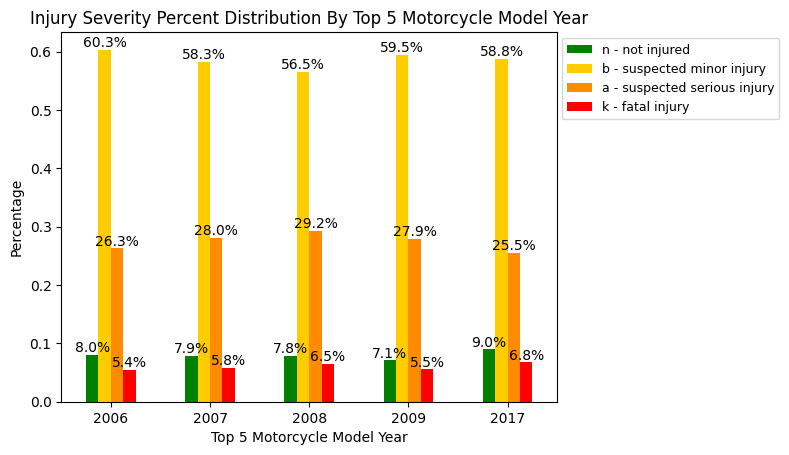

In [42]:
cross_tab = pd.crosstab(master[master.vehicle_model_year.isin(master.vehicle_model_year.value_counts().head().index)].vehicle_model_year, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Top 5 Motorcycle Model Year')
plt.xlabel('Top 5 Motorcycle Model Year')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [43]:
for vals in master[master.vehicle_model_year > 999].vehicle_model_year.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.vehicle_model_year == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mModel Year:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mModel Year:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2007
Injury: 1
Statistic: 0.0888335187762094
P-Value: 0.7656653655802581

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2007
Injury: 0
Statistic: 0.08883351877620939
P-Value: 0.7656653655802581

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2004
Injury: 1
Statistic: 0.021826869698624886
P-Value: 0.8825485980115167

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2004
Injury: 0
Statistic: 0.021826869698624886
P-Value: 0.8825485980115167

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2017
Injury: 1
Statistic: 0.5349472144825212
P-Value: 0.4645343416062917

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2017
Injury: 0
Statistic: 0.5349472144825212
P-Value: 0.4645343416062917

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2002
Injury: 1
Statistic: 0.05876190451494362
P-Value: 0.8084636109300221

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2002
Injury: 0
Stati

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1984
Injury: 1
Statistic: 0.03090336658564061
P-Value: 0.8604561496749974

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1984
Injury: 0
Statistic: 0.030903366585640614
P-Value: 0.8604561496749974

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1979
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1979
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== REJECT NULL HYPOTHESIS ==========
Model Year: 1982
Injury: 1
Statistic: 3.9852107866580955
P-Value: 0.045901357162842396

========== REJECT NULL HYPOTHESIS ==========
Model Year: 1982
Injury: 0
Statistic: 3.9852107866580955
P-Value: 0.045901357162842396

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1981
Injury: 1
Statistic: 0.4380777879579517
P-Value: 0.50805168730198

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1981
Injury: 0
Statistic: 0.4380777879579517
P-Value: 0.50805168730198

=========

<b><i>
    REJECT NULL HYPOTHESIS - FOR MOST!
</i></b>

The model year of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

(10 - DEFECTIVE OR NO VEHICLE BRAKES rejects only serious and minor injuries, almost rejects fatal)

---

<a id='miscvehiclemakecountry'></a>
<h3><b><i>
    Vehicle Make Country
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The make country of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The make country of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

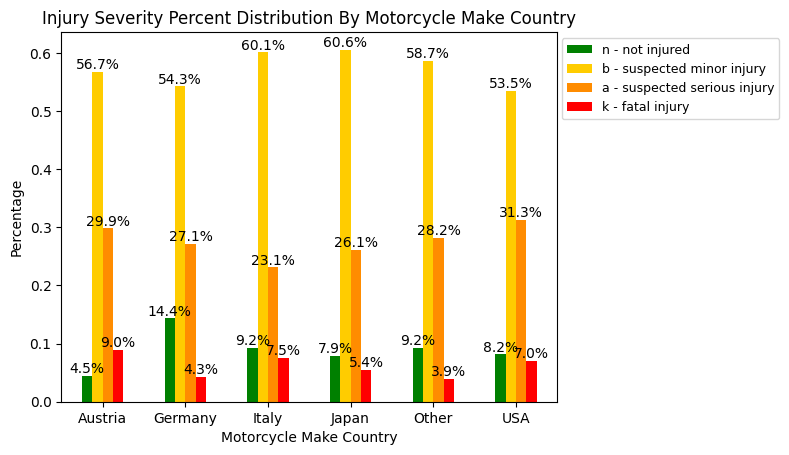

In [44]:
cross_tab = pd.crosstab(master.vehicle_make_country, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Motorcycle Make Country')
plt.xlabel('Motorcycle Make Country')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [45]:
for vals in master.vehicle_make_country.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.vehicle_make_country == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMake Country:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMake Country:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: USA
Injury: 1
Statistic: 0.0001147099851115574
P-Value: 0.9914546005131627

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: USA
Injury: 0
Statistic: 0.00011470998511155741
P-Value: 0.9914546005131627

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: Japan
Injury: 1
Statistic: 1.5080002880181704
P-Value: 0.21944447841886616

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: Japan
Injury: 0
Statistic: 1.5080002880181707
P-Value: 0.2194444784188662

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: Other
Injury: 1
Statistic: 1.378007251503984
P-Value: 0.24044087670206332

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: Other
Injury: 0
Statistic: 1.378007251503984
P-Value: 0.24044087670206332

========== REJECT NULL HYPOTHESIS ==========
Make Country: Germany
Injury: 1
Statistic: 8.910550092260186
P-Value: 0.0028352784579413373

========== REJECT NULL HYPOTHESIS ==========
Make Coun

<b><i>
    REJECT NULL HYPOTHESIS - ONLY GERMANY!
</i></b>

The make country of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

---

<a id='miscmakeandmodel'></a>
<h3><b><i>
    Make and Model
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The make and model of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The make and model of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

In [46]:
master['make_and_model'] = master.vehicle_make + ', ' + master.vehicle_model

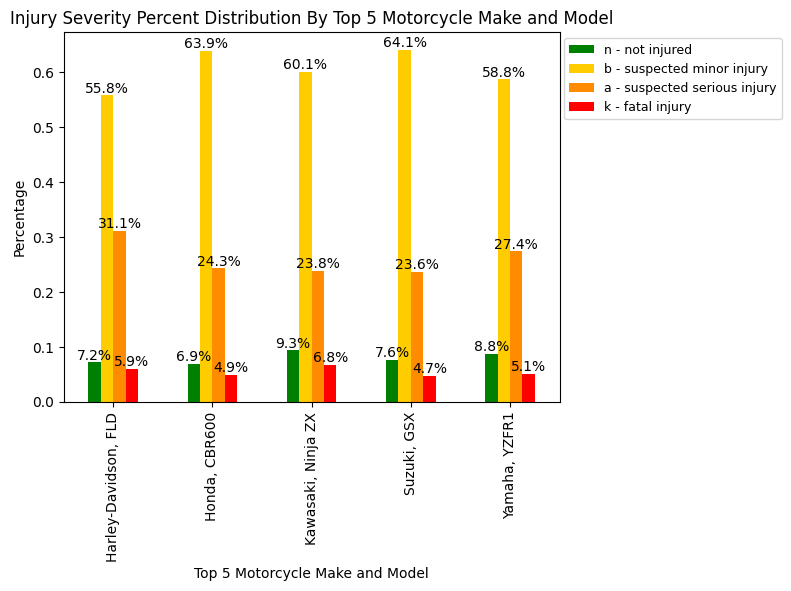

In [47]:
cross_tab = pd.crosstab(master[master.make_and_model.isin(master.make_and_model.value_counts().head().index)].make_and_model, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Top 5 Motorcycle Make and Model')
plt.xlabel('Top 5 Motorcycle Make and Model')
plt.xticks(rotation=90, ticks=range(5), labels=['Harley-Davidson, FLD', 'Honda, CBR600', 'Kawasaki, Ninja ZX', 'Suzuki, GSX', 'Yamaha, YZFR1'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [48]:
for vals in master.make_and_model.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.age_range == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMake and Model:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMake and Model:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fld
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fld
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsx-r600
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsx-r600
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yzfr6
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yzfr6
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, rz500
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, rz500
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdl
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdl
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtcutg
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtcutg
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, ex650
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, ex650
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf1000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ========

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: piaggio, bv
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtcui
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtcui
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrsca
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrsca
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zr1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zr1000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, c50
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
M

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, klx650
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zr1200
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zr1200
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, st1300
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, st1300
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, daytona
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, daytona
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsx1300
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flstf
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhs
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhs
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fz1
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fz1
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, multistrada
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, multistrada
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: polaris, sportsman
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make 

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cbr929
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb900
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb900
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xv1900
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xv1900
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxstsb
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxstsb
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vfr750
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, 

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn750
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, r1150
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, r1150
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, 1198
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, 1198
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, sr500
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, sr500
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, rx50
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, rx50
Injury: 0
Statistic: 

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: vespa, 946
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: vespa, 946
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, ls650
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, ls650
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb1000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, fl350
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, fl350
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vfr800
Injury: 1
Statistic: 

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, r series
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, r series
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, g650
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, g650
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vt600
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vt600
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: aprilia, sportcity
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: aprilia, sportcity
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xvz12
Injury: 1
Sta

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscx
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscx
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: indian motorcycle co., chieftain
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: indian motorcycle co., chieftain
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, en650
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, en650
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zx750
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zx750
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL H

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vf750
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn1500
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn1500
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, pcx
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, pcx
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yzf1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yzf1000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, vmx12
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, vmx12
Injury: 0


========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 380
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yf60
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yf60
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, rocket iii
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, rocket iii
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, speedmaster
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, speedmaster
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: husqvarna, supermoto701
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCE

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 125/150
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 125/150
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf110
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf110
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, panigale
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, panigale
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, rz350
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, rz350
Injury: 0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhpe
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, sprint
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, sprint
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kx250
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kx250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zr900
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zr900
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, sr400
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========


========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn2000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: piaggio, typhoon
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: piaggio, typhoon
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, scrambler
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, scrambler
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, xl250
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, xl250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: hawkeye, not applicable
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS =====

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, klx140
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, klx140
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscd
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscd
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 1090
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 1090
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cmx450
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cmx450
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davi

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zl900
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: sym, citycom
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: sym, citycom
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, aerio
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, aerio
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, g310
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, g310
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxwg
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxwg
Injur

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscaw
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsx-r1100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsx-r1100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, ncw50
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, ncw50
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 450
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 450
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flsb
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davids

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, enduro
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, ch125
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, ch125
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yfm300
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yfm300
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, speed triple
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, speed triple
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xv1100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make a

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsx1100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsx1100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fj600
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fj600
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, trx250
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, trx250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, xl-7
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, xl-7
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs300
Injury: 1
S

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: buell, xb9sx
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf50
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf50
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 530
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 530
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, ft500
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, ft500
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: zongshen, unknown
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: zongshen, unknown
Injury: 0
Statistic:

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb125
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb125
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yfm100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yfm100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, wr450
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, wr450
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, ps250
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, ps250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, ch150
Injury: 1
Statis

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, rmx450z
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, lt-a450
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, lt-a450
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 50
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 50
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, el650
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, el650
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, dr-z50
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, dr-z50
Injury: 0
Sta

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, rmx250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, v7 iii
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, v7 iii
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, 748
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, 748
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kymco usa inc, x-town
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kymco usa inc, x-town
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kymco usa inc, downtown
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and M

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, 999
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: action equipment, not applicable
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: action equipment, not applicable
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yfa1
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yfa1
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yfm700
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yfm700
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, ksf250
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, california 1100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gr650
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gr650
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kymco usa inc, spade 150
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kymco usa inc, spade 150
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kx100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kx100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, pe400
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Mak

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: x-ten corporation, unknown
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: x-ten corporation, unknown
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: sym, scooter
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: sym, scooter
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs1100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs1100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, 1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, 1000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Mo

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, r65
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, r65
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kymco usa inc, k-pipe
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kymco usa inc, k-pipe
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: american iron horse, tejas sj
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: american iron horse, tejas sj
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, fl400
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, fl400
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make an

<b><i>
    REJECT NULL HYPOTHESIS - FOR MOST!
</i></b>

The make and model of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

(10 - DEFECTIVE OR NO VEHICLE BRAKES rejects only serious and minor injuries, almost rejects fatal)

---

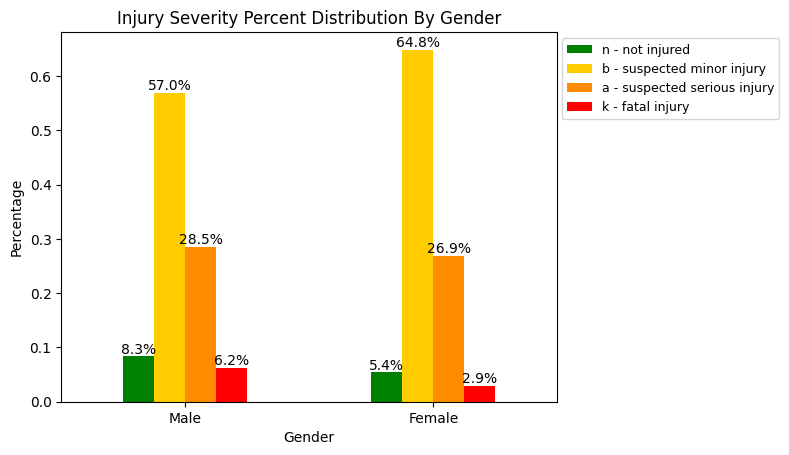

In [49]:
cross_tab = pd.crosstab(master.person_gender[~master.person_gender.str.startswith('99')], master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0, ticks=range(2), labels=['Male', 'Female'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [50]:
import re
# cont_thing.replace(to_replace=re.compile(r'.*speed.*', re.IGNORECASE), value='SPEEDING', regex=True)

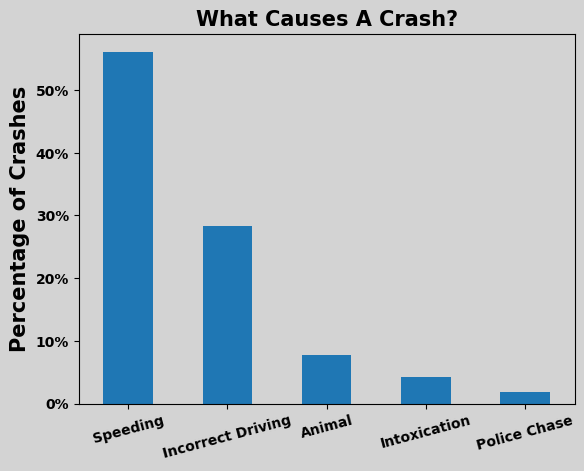

In [51]:
cont_thing = w.wrangle()
cont_thing = cont_thing[~cont_thing.contributing_factor_1.str.startswith('98')]
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*no\sdata.*', re.IGNORECASE), value='SPEEDING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*speed.*', re.IGNORECASE), value='SPEEDING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*intoxicated.*', re.IGNORECASE), value='INTOXICATED-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*alcohol.*', re.IGNORECASE), value='INTOXICATED-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*drinking.*', re.IGNORECASE), value='INTOXICATED-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*drug.*', re.IGNORECASE), value='INTOXICATED-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*animal.*', re.IGNORECASE), value='ANIMAL-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*heed.*', re.IGNORECASE), value='ROADSIGN-IGNORING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*disregard.*', re.IGNORECASE), value='ROADSIGN-IGNORING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*evasive\saction.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*driver\sinattention.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*single\slane.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*lane\swhen\sunsafe.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*too\sclosely.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*turned\swhen.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*turned\simproperly.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*improper\sstart.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*failed.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*roadsign.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*pass.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*cell.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*fleeing\sor\sevading.*', re.IGNORECASE), value='POLICE-CHASE-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*ill.*', re.IGNORECASE), value='HEALTH-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*fatigued.*', re.IGNORECASE), value='HEALTH-RELATED', regex=True)
cont_thing.contributing_factor_1.value_counts()
fig, ax = plt.subplots(facecolor='lightgray')
ax.set_facecolor('lightgray') 
ax = cont_thing.contributing_factor_1.value_counts(normalize=True).head(5).plot(kind='bar')
plt.title('What Causes A Crash?', fontweight='bold', fontsize=15)
plt.xlabel('')
plt.xticks(rotation=15, ticks=range(5), labels=['Speeding', 'Incorrect Driving', 'Animal', 'Intoxication', 'Police Chase'], fontweight='bold', fontsize=10)
plt.ylabel('Percentage of Crashes', fontweight='bold', fontsize=15) 
plt.yticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5], labels=['0%', '10%', '20%', '30%', '40%', '50%'], fontweight='bold', fontsize=10)
#for p in ax.patches:
#    ax.annotate(f"{p.get_height():.0%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

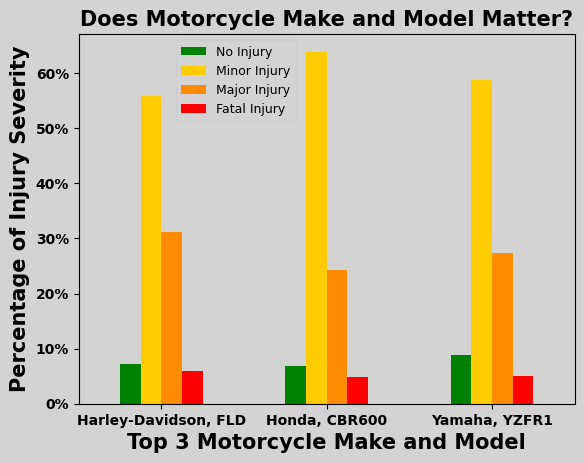

In [65]:
cross_tab = pd.crosstab(master[master.make_and_model.isin(master.make_and_model.value_counts().head(3).index)].make_and_model, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
fig, ax = plt.subplots(facecolor='lightgray')
ax.set_facecolor('lightgray')
ax = cross_tab.plot(kind='bar', color=colors, ax=ax)
plt.title('Does Motorcycle Make and Model Matter?', fontweight='bold', fontsize=15)
plt.xlabel('Top 3 Motorcycle Make and Model', fontweight='bold', fontsize=15)
plt.xticks(rotation=0, ticks=range(3), labels=['Harley-Davidson, FLD', 'Honda, CBR600', 'Yamaha, YZFR1'], fontweight='bold', fontsize=10)
plt.ylabel('Percentage of Injury Severity', fontweight='bold', fontsize=15)
plt.yticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], labels=['0%', '10%', '20%', '30%', '40%', '50%', '60%'], fontweight='bold', fontsize=10)
#for p in ax.patches:
#    ax.annotate(f"{p.get_height():.0%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9}, labels=['No Injury', 'Minor Injury', 'Major Injury', 'Fatal Injury'], facecolor='lightgray')
legend.set_bbox_to_anchor((0.45, 1))
plt.show()

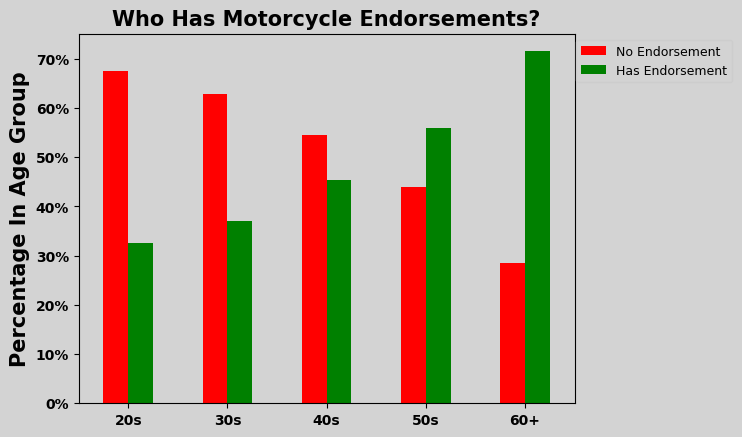

In [53]:
cross_tab = pd.crosstab(master.age_range, master.has_motocycle_endorsment, normalize='index')
colors = ['red', 'green']
fig, ax = plt.subplots(facecolor='lightgray')
ax.set_facecolor('lightgray')
ax = cross_tab.plot(kind='bar', color=colors, ax=ax)
plt.title('Who Has Motorcycle Endorsements?', fontweight='bold', fontsize=15)
plt.xlabel('')
plt.xticks(rotation=0, fontweight='bold', fontsize=10)
plt.ylabel('Percentage In Age Group', fontweight='bold', fontsize=15)
plt.yticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], labels=['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%'], fontweight='bold', fontsize=10)
legend = plt.legend(loc='upper right', prop={'size': 9}, labels=['No Endorsement', 'Has Endorsement'], facecolor='lightgray')
legend.set_bbox_to_anchor((1.33, 1))
plt.show()

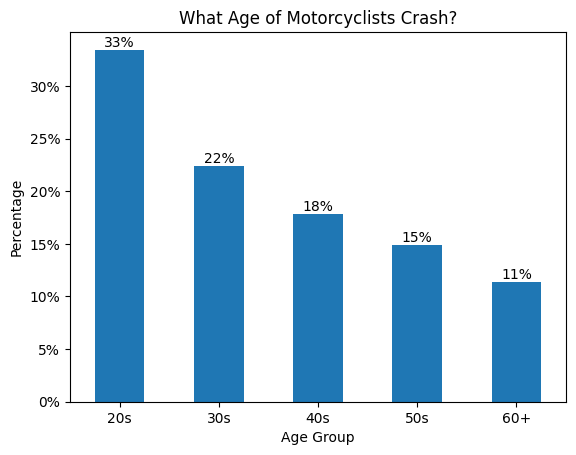

In [54]:
ax = master.age_range.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('What Age of Motorcyclists Crash?')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.yticks(ticks=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3], labels=['0%', '5%', '10%', '15%', '20%', '25%', '30%'])
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

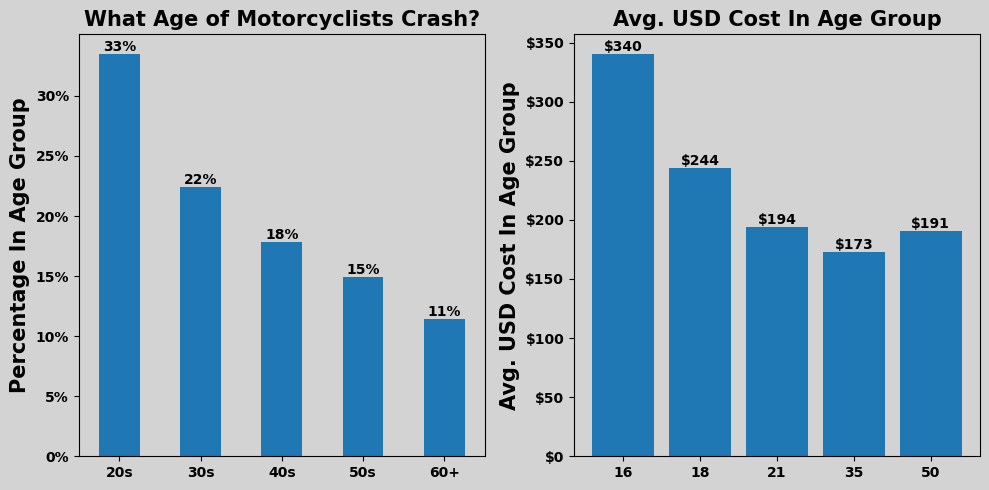

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), facecolor='lightgray')
ax1 = master.age_range.value_counts(normalize=True).sort_index().plot(kind='bar', ax=ax1)
ax1.set_facecolor('lightgray')
ax1.set_title('What Age of Motorcyclists Crash?', fontweight='bold', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Percentage In Age Group', fontweight='bold', fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontweight='bold', fontsize=10)
ax1.set_yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3])
ax1.set_yticklabels(['0%', '5%', '10%', '15%', '20%', '25%', '30%'], fontweight='bold', fontsize=10)
for p in ax1.patches:
    ax1.annotate(f"{p.get_height():.0%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

x_values = [1, 2, 3, 4, 5]
y_values = [340, 244, 194, 173, 191]
ax2.bar(x_values, y_values)
ax2.set_facecolor('lightgray')
ax2.set_title('Avg. USD Cost In Age Group', fontweight='bold', fontsize=15)
ax2.set_xticklabels(['', '16', '18', '21', '35', '50'], rotation=0, fontweight='bold', fontsize=10)
ax2.set_ylabel('Avg. USD Cost In Age Group', fontweight='bold', fontsize=15)
ax2.set_yticks([0, 50, 100, 150, 200, 250, 300, 350])
ax2.set_yticklabels(['$0', '$50', '$100', '$150', '$200', '$250', '$300', '$350'], fontweight='bold', fontsize=10)
for p in ax2.patches:
    ax2.annotate(f"${p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')
plt.tight_layout()
plt.show()

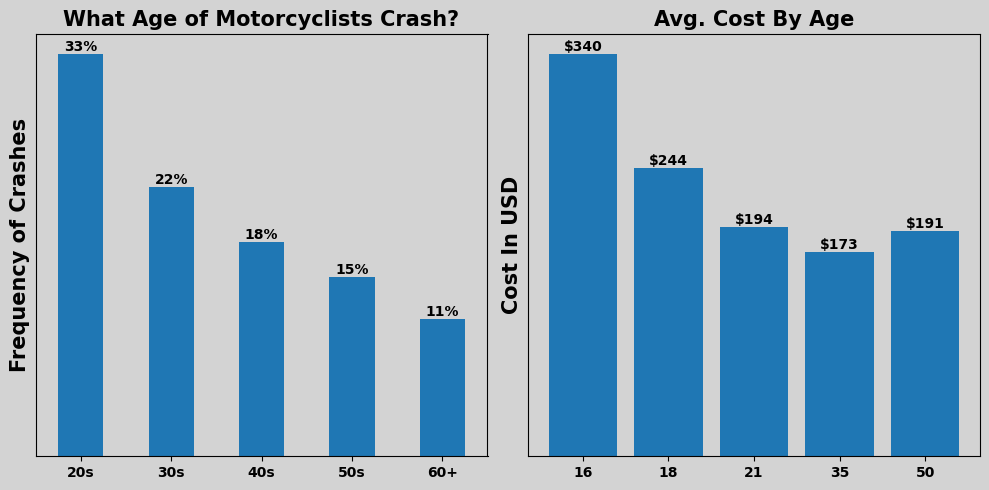

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), facecolor='lightgray')
ax1 = master.age_range.value_counts(normalize=True).sort_index().plot(kind='bar', ax=ax1)
ax1.set_facecolor('lightgray')
ax1.set_title('What Age of Motorcyclists Crash?', fontweight='bold', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Frequency of Crashes', fontweight='bold', fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontweight='bold', fontsize=10)
ax1.set_yticks([])
ax1.set_yticklabels([])
for p in ax1.patches:
    ax1.annotate(f"{p.get_height():.0%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

x_values = [1, 2, 3, 4, 5]
y_values = [340, 244, 194, 173, 191]
ax2.bar(x_values, y_values)
ax2.set_facecolor('lightgray')
ax2.set_title('Avg. Cost By Age', fontweight='bold', fontsize=15)
ax2.set_xticklabels(['', '16', '18', '21', '35', '50'], rotation=0, fontweight='bold', fontsize=10)
ax2.set_ylabel('Cost In USD', fontweight='bold', fontsize=15)
ax2.set_yticks([])
ax2.set_yticklabels([])
for p in ax2.patches:
    ax2.annotate(f"${p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')
plt.tight_layout()
plt.show()

In [57]:
otherthing = pd.read_csv('svcs.csv', index_col=0)

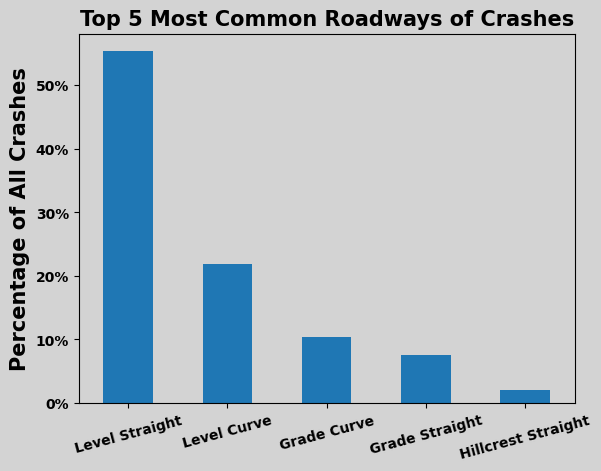

In [58]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.set_facecolor('lightgray') 
ax = otherthing.roadway_alignment.value_counts(normalize=True).head(5).plot(kind='bar')
plt.title('Top 5 Most Common Roadways of Crashes', fontweight='bold', fontsize=15)
plt.xlabel('')
plt.xticks(rotation=15, ticks=[0, 1, 2, 3, 4], labels=['Level Straight', 'Level Curve', 'Grade Curve', 'Grade Straight', 'Hillcrest Straight'], fontweight='bold', fontsize=10)
plt.ylabel('Percentage of All Crashes', fontweight='bold', fontsize=15)
plt.yticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5], labels=['0%', '10%', '20%', '30%', '40%', '50%'], fontweight='bold', fontsize=10)
plt.show()

In [61]:
otherthing.person_injury_severity.value_counts(normalize=True)

person_injury_severity
B - SUSPECTED MINOR INJURY      0.574785
A - SUSPECTED SERIOUS INJURY    0.283336
N - NOT INJURED                 0.081981
K - FATAL INJURY                0.059898
Name: proportion, dtype: float64

In [ ]:
otherthing